In [0]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
(X_train,_),(_,_) = mnist.load_data()

In [48]:
print(X_train.shape)

(60000, 28, 28)


In [49]:
#Reshaping
X_train = X_train.reshape((*X_train.shape,1))
print(X_train.shape)

(60000, 28, 28, 1)


In [0]:
# print(X_train[0])

In [51]:
#Normalizing data
X_train = (X_train.astype('float32') - 127.5)/127.5
print(np.max(X_train))
print(np.min(X_train))

1.0
-1.0


In [0]:
NO_EPOCHS = 100
BATCH_SIZE = 256
NO_OF_BATCHES = math.ceil(X_train.shape[0]/float(BATCH_SIZE))
HALF_BATCH = int(BATCH_SIZE/2)

NOISE_DIM = 100

adam = Adam(lr=2e-4,beta_1=0.5)

In [53]:
# Defining Generator
generator = Sequential()

generator.add(Dense(7*7*128,input_shape=(NOISE_DIM,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# Upsampling 14 X 14 X 64
generator.add(UpSampling2D())
generator.add(Conv2D(64,kernel_size=(5,5),padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# Upsampling 28 X 28 X 1
generator.add(UpSampling2D())
generator.add(Conv2D(1,kernel_size=(5,5),padding='same',activation='tanh'))

generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()

# Define Discriminator
discriminator = Sequential()

discriminator.add(Conv2D(64,kernel_size=(5,5),strides=(2,2),input_shape=(28,28,1),padding='same'))
discriminator.add(LeakyReLU(0.2))

# Next Conv layer (14 X 14 X 64) ---> (7 X 7 X 128)
discriminator.add(Conv2D(128,kernel_size=(5,5),padding='same',strides=(2,2)))
discriminator.add(LeakyReLU(0.2))

# Flatten
discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_4 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 14, 14, 64)       

In [0]:
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

#Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

def save_imgs(epoch,samples=100):
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('outputs/OutputAtEpoch_{0}.png'.format(epoch+1))
    plt.show()

In [0]:
X_Train = X_train

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 D loss: 161.476682 G loss: 208.540338
Epoch 2 D loss: 162.535409 G loss: 196.862222
Epoch 3 D loss: 161.119587 G loss: 197.012411
Epoch 4 D loss: 162.422527 G loss: 191.644359
Epoch 5 D loss: 162.375743 G loss: 190.696685
Epoch 6 D loss: 162.159430 G loss: 190.727557
Epoch 7 D loss: 161.979719 G loss: 191.342009
Epoch 8 D loss: 161.847027 G loss: 191.467240
Epoch 9 D loss: 161.778153 G loss: 191.015570
Epoch 10 D loss: 161.692184 G loss: 191.335954


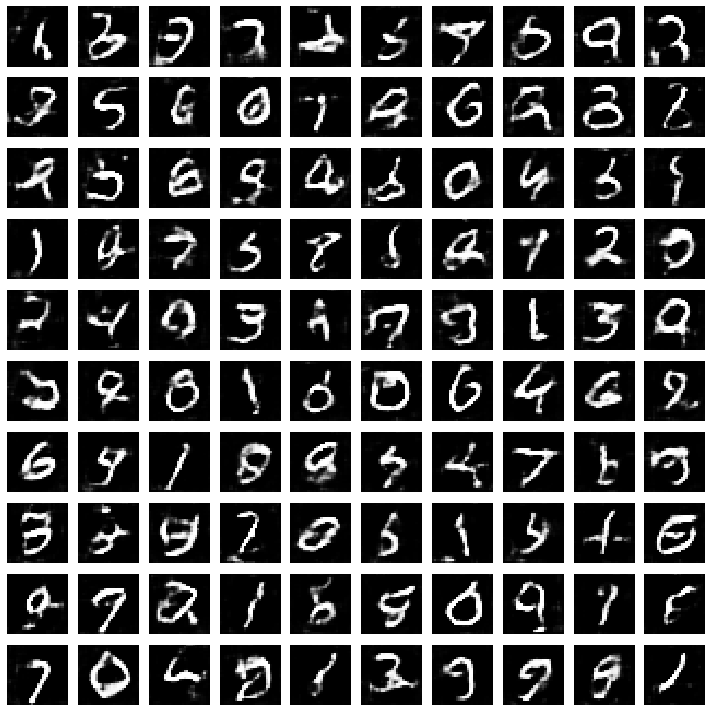

Epoch 11 D loss: 161.633952 G loss: 191.350371
Epoch 12 D loss: 161.492741 G loss: 191.368305
Epoch 13 D loss: 161.391240 G loss: 192.061920
Epoch 14 D loss: 161.394674 G loss: 191.685783
Epoch 15 D loss: 161.262994 G loss: 192.234076
Epoch 16 D loss: 161.186610 G loss: 192.841177
Epoch 17 D loss: 161.009911 G loss: 193.334298
Epoch 18 D loss: 161.050898 G loss: 192.063587
Epoch 19 D loss: 160.769584 G loss: 194.667427
Epoch 20 D loss: 160.694786 G loss: 194.244719


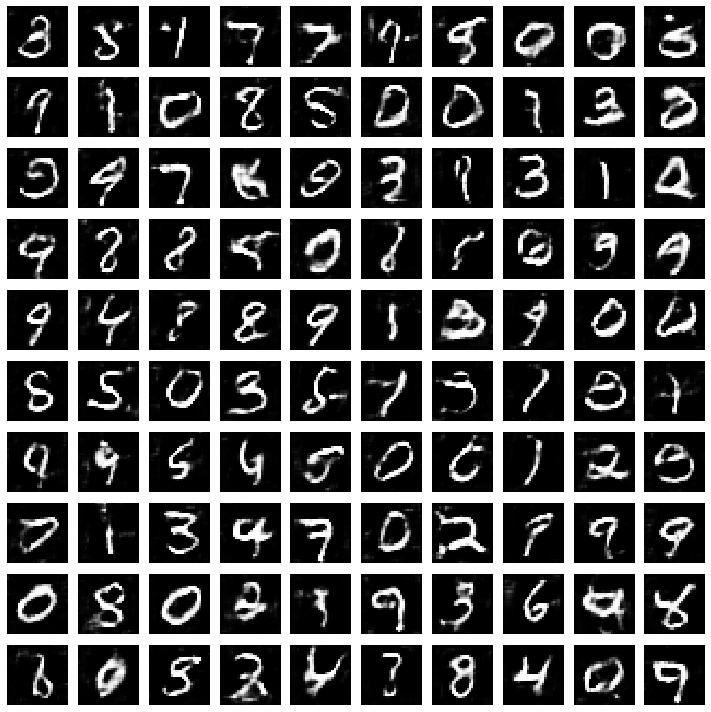

Epoch 21 D loss: 160.506382 G loss: 195.524419
Epoch 22 D loss: 160.515090 G loss: 195.116698
Epoch 23 D loss: 160.321828 G loss: 195.110527
Epoch 24 D loss: 160.307812 G loss: 195.168154
Epoch 25 D loss: 160.007250 G loss: 197.672108
Epoch 26 D loss: 159.984351 G loss: 196.239432
Epoch 27 D loss: 159.762301 G loss: 198.643031
Epoch 28 D loss: 159.603413 G loss: 198.216815
Epoch 29 D loss: 159.483992 G loss: 198.374223
Epoch 30 D loss: 159.235091 G loss: 200.470722


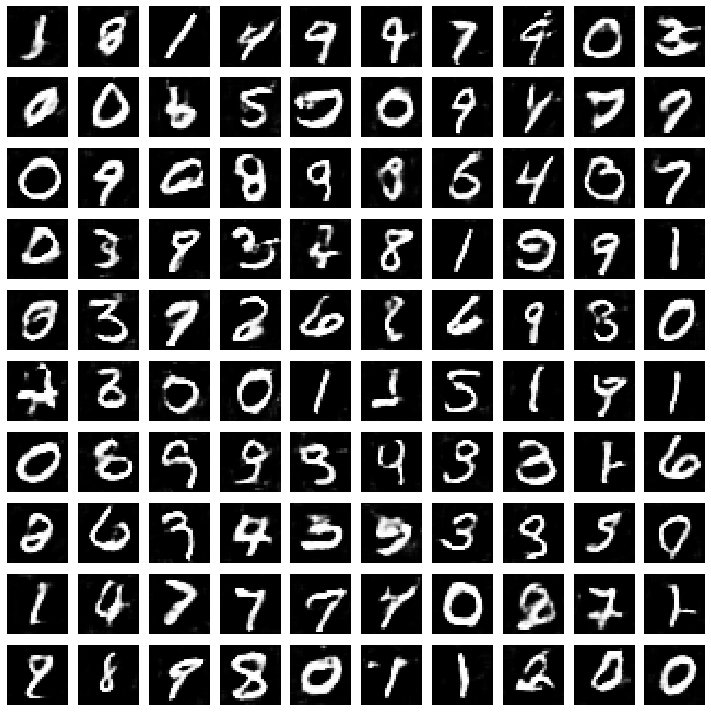

Epoch 31 D loss: 159.256495 G loss: 199.707910
Epoch 32 D loss: 159.041405 G loss: 200.266899
Epoch 33 D loss: 158.779108 G loss: 201.677352
Epoch 34 D loss: 158.523494 G loss: 201.891625
Epoch 35 D loss: 158.459805 G loss: 203.043513
Epoch 36 D loss: 157.927571 G loss: 207.066788
Epoch 37 D loss: 157.971770 G loss: 203.646098
Epoch 38 D loss: 157.670453 G loss: 204.959494
Epoch 39 D loss: 157.608214 G loss: 205.944010
Epoch 40 D loss: 157.333909 G loss: 207.037193


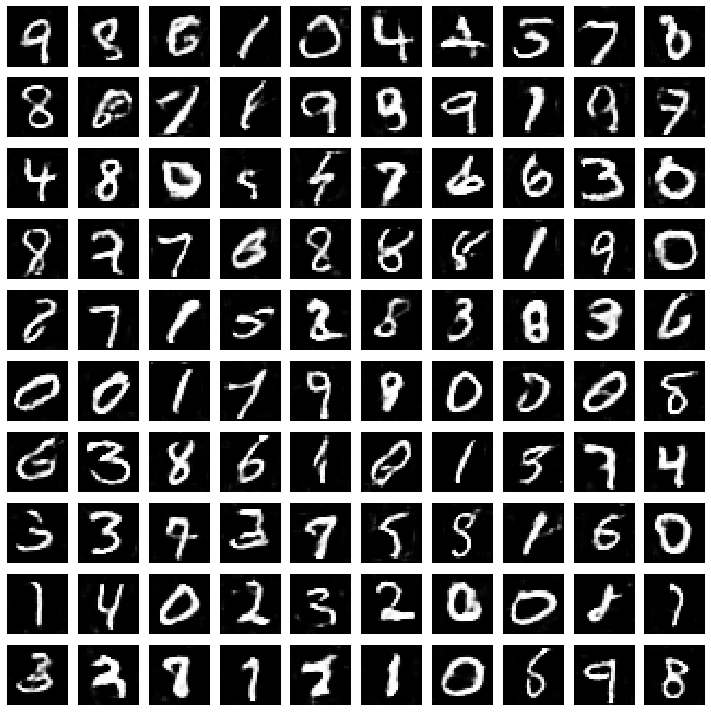

Epoch 41 D loss: 156.939650 G loss: 208.712287
Epoch 42 D loss: 156.593788 G loss: 210.711794
Epoch 43 D loss: 156.429910 G loss: 210.674252
Epoch 44 D loss: 156.194671 G loss: 211.717709
Epoch 45 D loss: 155.852305 G loss: 212.548852
Epoch 46 D loss: 155.618731 G loss: 213.940093
Epoch 47 D loss: 155.129371 G loss: 215.454838
Epoch 48 D loss: 154.906229 G loss: 216.235145
Epoch 49 D loss: 154.631666 G loss: 217.759580
Epoch 50 D loss: 154.336076 G loss: 219.001452


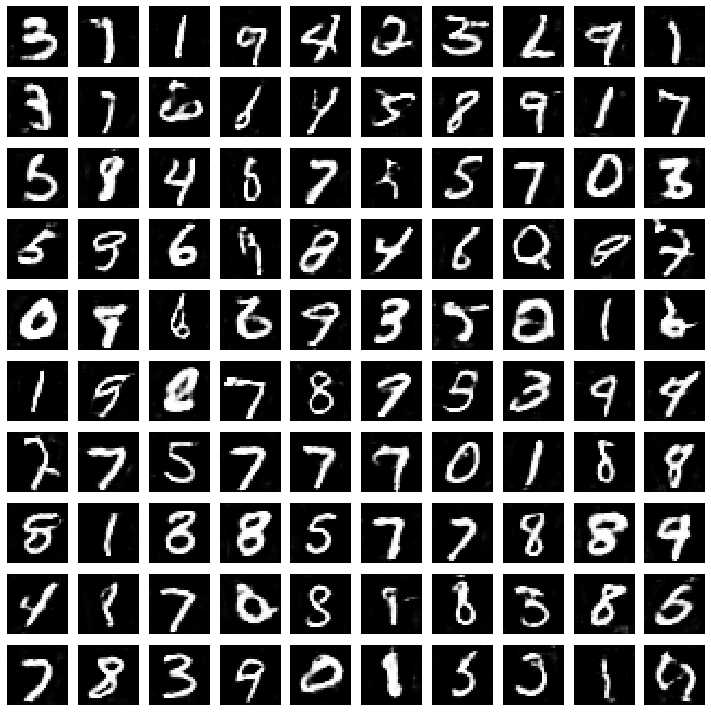

Epoch 51 D loss: 153.959825 G loss: 220.313611
Epoch 52 D loss: 153.499462 G loss: 222.639498
Epoch 53 D loss: 153.292503 G loss: 223.506288
Epoch 54 D loss: 152.919446 G loss: 224.960985
Epoch 55 D loss: 152.570873 G loss: 226.365361
Epoch 56 D loss: 152.093167 G loss: 228.233656
Epoch 57 D loss: 151.920157 G loss: 229.600858
Epoch 58 D loss: 151.618185 G loss: 230.504474
Epoch 59 D loss: 151.304874 G loss: 233.176895
Epoch 60 D loss: 150.865028 G loss: 233.461515


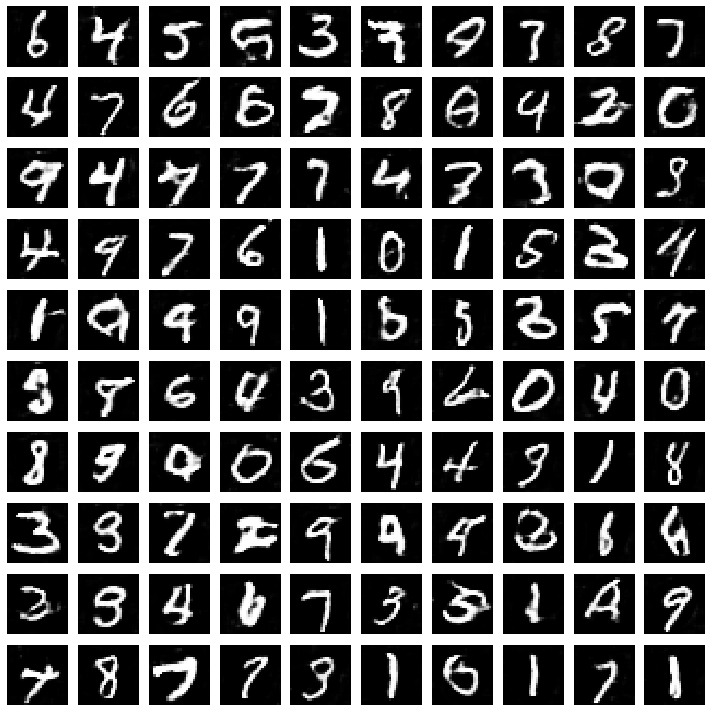

Epoch 61 D loss: 150.510322 G loss: 235.854153
Epoch 62 D loss: 150.042221 G loss: 236.749932
Epoch 63 D loss: 149.798989 G loss: 238.870525
Epoch 64 D loss: 149.357695 G loss: 240.042248
Epoch 65 D loss: 149.159434 G loss: 241.964306
Epoch 66 D loss: 148.840286 G loss: 243.884394
Epoch 67 D loss: 148.164556 G loss: 245.508939
Epoch 68 D loss: 148.013177 G loss: 246.896427
Epoch 69 D loss: 147.749660 G loss: 248.646606
Epoch 70 D loss: 147.269440 G loss: 250.742892


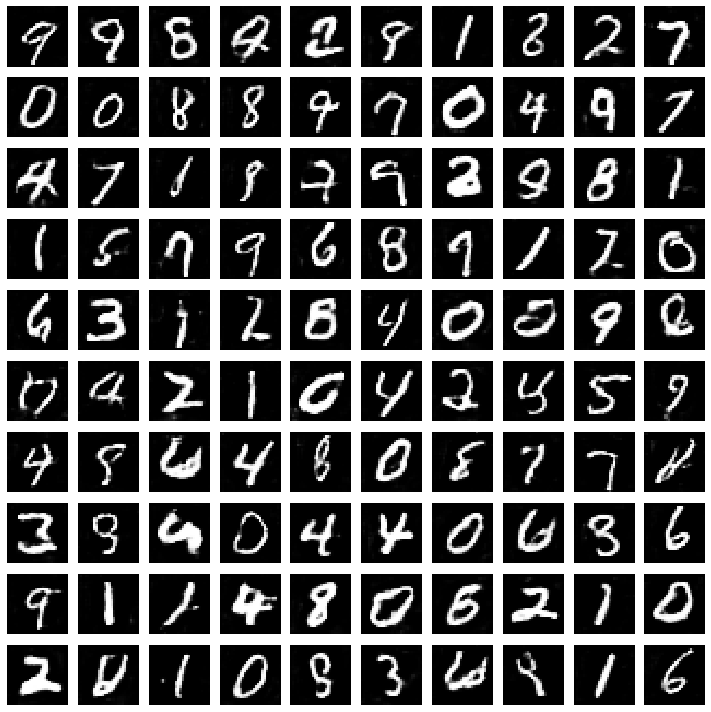

Epoch 71 D loss: 146.881829 G loss: 252.268920
Epoch 72 D loss: 146.450219 G loss: 255.243698
Epoch 73 D loss: 146.286180 G loss: 255.151206
Epoch 74 D loss: 145.783861 G loss: 257.902290
Epoch 75 D loss: 145.493852 G loss: 259.399073
Epoch 76 D loss: 144.944175 G loss: 260.579442
Epoch 77 D loss: 144.731600 G loss: 263.330635
Epoch 78 D loss: 144.776883 G loss: 265.275676
Epoch 79 D loss: 144.181718 G loss: 267.022291
Epoch 80 D loss: 143.812272 G loss: 268.459843


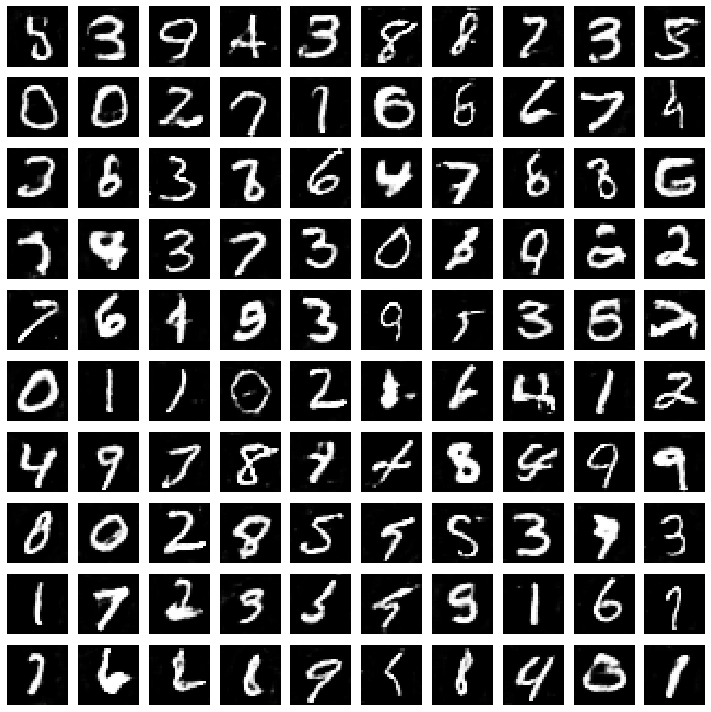

Epoch 81 D loss: 143.386859 G loss: 270.647539
Epoch 82 D loss: 143.177216 G loss: 272.178634
Epoch 83 D loss: 142.732935 G loss: 274.535122
Epoch 84 D loss: 142.202865 G loss: 276.664363
Epoch 85 D loss: 141.755490 G loss: 278.014421
Epoch 86 D loss: 141.994409 G loss: 280.412047
Epoch 87 D loss: 141.522876 G loss: 281.256227
Epoch 88 D loss: 141.174704 G loss: 283.048205
Epoch 89 D loss: 140.739809 G loss: 285.395745
Epoch 90 D loss: 140.296473 G loss: 287.302200


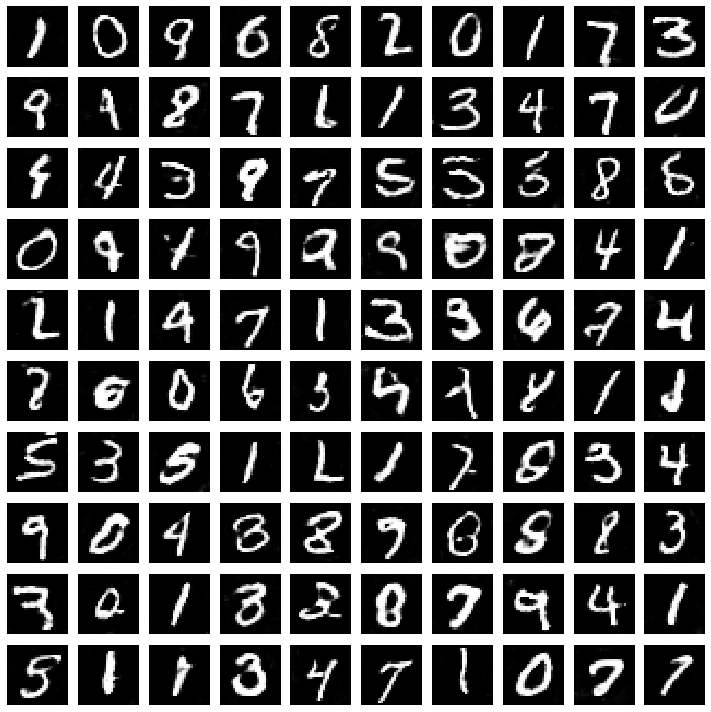

Epoch 91 D loss: 140.567749 G loss: 287.779706
Epoch 92 D loss: 139.263368 G loss: 291.332048
Epoch 93 D loss: 139.525136 G loss: 292.019911
Epoch 94 D loss: 139.524952 G loss: 295.159943
Epoch 95 D loss: 138.994196 G loss: 295.628318
Epoch 96 D loss: 138.990874 G loss: 297.670386
Epoch 97 D loss: 138.999454 G loss: 299.127431
Epoch 98 D loss: 137.984366 G loss: 300.539204
Epoch 99 D loss: 137.433118 G loss: 302.462721
Epoch 100 D loss: 137.609204 G loss: 304.328687


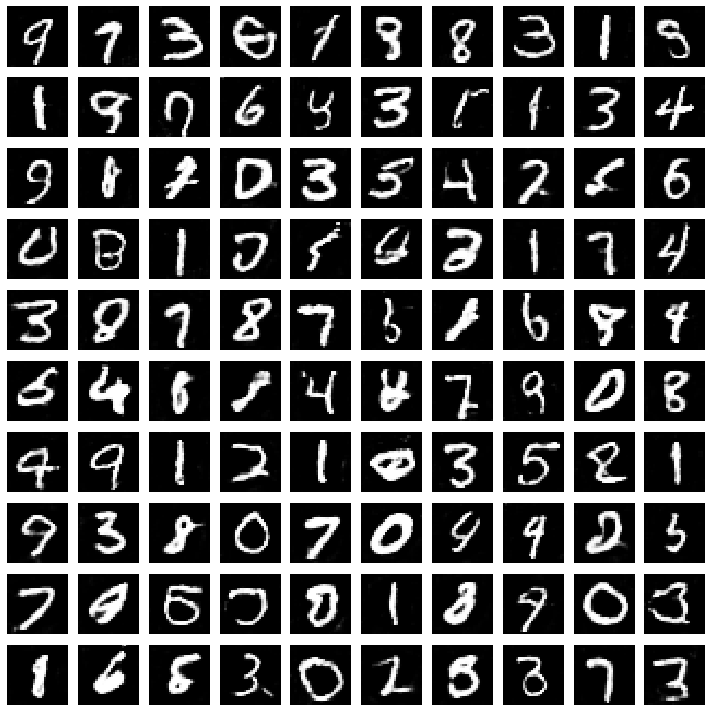

In [56]:
for epoch in range(NO_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    for step in range(NO_OF_BATCHES):
        #randomly select 50% real images
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH)
        real_imgs = X_Train[idx]
        
        # generate 50% random images
        noise = np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
        fake_imgs = generator.predict(noise)
        
        
        # one sided label smoothing
        real_y = np.ones((HALF_BATCH,1))*0.9 #Label Smoothing, Works well in practice
        fake_y = np.zeros((HALF_BATCH,1))
        
        # train on real and fake images
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y) #updates the weights of discriminator
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y) 
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        
        #Train Generator (Complete Model Generator + Frozen Discriminator)
        
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        real_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,real_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d D loss: %f G loss: %f" % ((epoch + 1), epoch_d_loss, epoch_g_loss))

    if (epoch+1)%10==0:
        save_imgs(epoch)
        generator.save('ganweights/dcgan_generator_{0}.h5'.format(epoch+1))
        

In [36]:
!dir

images	model  sample_data


In [45]:
# !mkdir model
# !mkdir images
!mkdir outputs
!mkdir ganweights
!ls


mkdir: cannot create directory ‘outputs’: File exists
ganweights  images  model  outputs  sample_data


In [0]:
from google.colab import files

for i in range(10,101,10):
  path = 'outputs/OutputAtEpoch_' + (str)(i) + '.png'
  files.download(path)
  

In [0]:
# path = 'outputs/OutputAtEpoch_' + (str)(i) + '.png'
# print(type(path))

In [0]:
# ganweights/dcgan_generator_{0}.h5
# for i in range(10,101,10):
#   path = "ganweights/dcgan_generator_" + (str)(i) + ".h5"
#   files.download(path)
# files.download("ganweights/dcgan_generator_10.h5")
